In [1]:
#----------------------------------Import Libraries---------------------------------#
import pandas as pd # importing all necessary Libraries 
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg

In [2]:
#----------------------------------Reading file-------------------------------------#
df = pd.read_csv("datasetA6_HP.csv") # read datasetA6_HP.csv file
plt.style.use('seaborn-whitegrid')

In [3]:
#-----------------------------------Defining all necessary functions------------------------#
def corr(data1,data2): # function to calculate coreelation
    data1_mean = data1.mean() # find mean
    data2_mean = data2.mean()
    a,b,c = 0,0,0
    for i,j in zip(data1,data2):
        a += (i-data1_mean)*(j-data2_mean)
        b += (i-data1_mean)**2
        c += (j-data2_mean)**2
    return a/((b**0.5)*(c**0.5)) # return correlation


In [4]:

def AR_model(lags,train,test): # function to make Auto Regression model
    model = AutoReg(train,lags=lags)
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1,dynamic=False)    
    return predictions # returning prediction of test data

In [5]:
#-----------------------------------Solution of QUESTION 1---------------------------------#
def Q1():
    print("-> 1(a).")
    plt.plot(df.index,df["HP"],color='red') # ploting days v/s power consumed
    plt.ylabel("Power consumed (in MU)")
    plt.xlabel("Days")
    plt.title("Line Plot between Day v/s Power Consumption")
    plt.show()
    
    print("\n-> 1(b).\n Pearson Correlation coefficient b/w generated one day lag time"+ 
    "and the given time sequence:",corr(df["HP"][1:],df["HP"][:-1])) # calling correlation function to calculate correlation
    
    print("\n-> 1(c).\n Scatter Plot b/w generated one day lag time and the given time sequence")
    plt.scatter(df["HP"][1:],df["HP"][:-1],color="blue") # plotting sactter plot
    plt.xlabel("Given time sequence")
    plt.ylabel("Generated one day lag time sequence")
    plt.show()
    
    print("\n-> 1(d).\nPearson Correlation coefficient:")
    corr_list = [] # initialize correlation list that contain correlation for different lags
    for i in range(1,8):
        cor = corr(df["HP"][i:],df["HP"][:-i]) # finding correlation
        corr_list.append(cor)
        print("\t* For time lag "+str(i)+": ",cor)
    plt.plot(range(1,8),corr_list,linestyle="-.",marker="o",color="orange") # plotting graph
    plt.xlabel("Time lags")
    plt.ylabel("Pearson correlation coefficient")
    plt.show()
    
    print("\n-> 1(e).")
    plot_acf(df["HP"],lags=list(range(1,8)),color='blue') # using plot_acf to plot autocorrelation for different lags
    plt.xlabel("Time lags")
    plt.ylabel("Pearson correlation coefficient")
    plt.show()


-> 1(a).


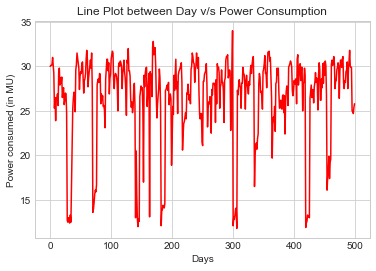


-> 1(b).
 Pearson Correlation coefficient b/w generated one day lag timeand the given time sequence: 0.767501276652385

-> 1(c).
 Scatter Plot b/w generated one day lag time and the given time sequence


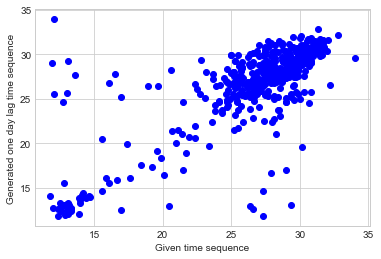


-> 1(d).
Pearson Correlation coefficient:
	* For time lag 1:  0.767501276652385
	* For time lag 2:  0.6027929528346153
	* For time lag 3:  0.44362253115606753
	* For time lag 4:  0.3248490671116213
	* For time lag 5:  0.18435775797011272
	* For time lag 6:  0.06160654041789676
	* For time lag 7:  -0.026197243228931372


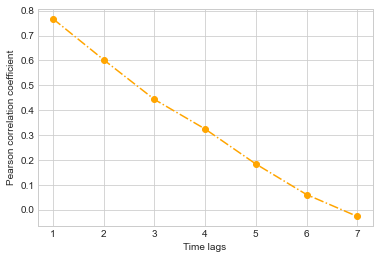


-> 1(e).


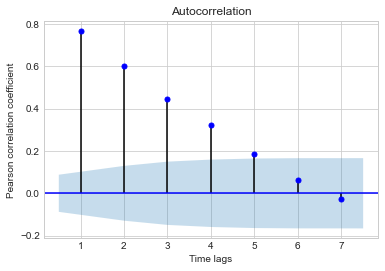

In [6]:
Q1()

In [7]:
#-----------------------------------Solution of QUESTION 2---------------------------------#
def Q2():
    print("\t-> Persistance Model is a basic model for AutoRag of Time series Data")
    print("\t-> y(x+t) = y(x), where t is some constant")
    actual,predict = df["HP"][len(df)-250:],df["HP"][len(df)-251:-1] # finding actual and prediction of persistance model
    print("\t-> RMSE of Presistance Model:",mean_squared_error(actual,predict)**0.5)# calculate RMSE


In [8]:
Q2()

	-> Persistance Model is a basic model for AutoRag of Time series Data
	-> y(x+t) = y(x), where t is some constant
	-> RMSE of Presistance Model: 3.191708006694848


In [9]:
#-----------------------------------Solution of QUESTION 3---------------------------------#
def Q3():
    print("-> 3(a).")
    train,test = df["HP"][:len(df)-250],df["HP"][len(df)-250:] # spliting train and test data / last 250 days is for test data
    predictions = AR_model(5,train,test) # calling AR_model function to get prediction of test data for lag = 5
    print("\t* RMSE for Test data with lag=5 AutoReg:",mean_squared_error(predictions,test)**0.5) # calculating RMSE
    
    print("\t* Scatter Plot b/w original test data time seq. and predicted test data time seq.")
    plt.scatter(test,predictions,color = "#d11554") # scatter plot between actual and predicted value
    plt.xlabel("Original Test data")
    plt.ylabel("Predicted test data")
    plt.show()
    
    print("\n-> 3(b).")
    lag = [1,5,10,15,25] #list of different lags
    for i in lag:
        predict = AR_model(i,train,test) # calling AR_model function to get prediction of test data for diffrent lags 
        print("\t* RMSE for time lag = "+str(i)+" is",mean_squared_error(predict,test)**0.5)# calculating RMSE for different lags
    
    print("\n-> 3(c).")
    threshold = 2/((len(train))**0.5) # calculating 
    print("\t* Threshold for Auto correlation:",threshold)
    count = 0 # counting number of lags req
    corr_list = [] # initialize correlation list that contain correlation for different lags
    for i in range(1,len(df)): # finding optimal number of lags required
        correlation = corr(train[i:],train[:-i])
        if(abs(correlation)>threshold):
            corr_list.append(round(correlation,3))
            count+=1
        else:
            break
    print("\t* Time Lags for which correlation is significant:",list(range(1,count+1)))
    print("\t* Corresponding Correlations Coefficients are:",corr_list)
    predict = AR_model(count,train,test) # calling AR_model function to get prediction of test data for optimal lags
    print("\t* RMSE with optimal number of time lag = "+str(count)+" is:",mean_squared_error(predict,test)**0.5) # calculating RMSE


-> 3(a).
	* RMSE for Test data with lag=5 AutoReg: 4.537007584381682
	* Scatter Plot b/w original test data time seq. and predicted test data time seq.


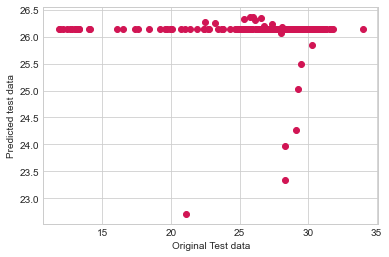


-> 3(b).
	* RMSE for time lag = 1 is 4.536667335444055
	* RMSE for time lag = 5 is 4.537007584381682
	* RMSE for time lag = 10 is 4.526283621756578
	* RMSE for time lag = 15 is 4.555827067010276
	* RMSE for time lag = 25 is 4.5141301858890435

-> 3(c).
	* Threshold for Auto correlation: 0.12649110640673517
	* Time Lags for which correlation is significant: [1, 2, 3, 4, 5]
	* Corresponding Correlations Coefficients are: [0.783, 0.634, 0.481, 0.353, 0.205]
	* RMSE with optimal number of time lag = 5 is: 4.537007584381682


In [10]:
Q3()